                                                                                                Submitted by Vivek Raju

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper functions

In [2]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

# Load data

In [4]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [5]:
X = pd.DataFrame([im.histogram() for im in images])

In [6]:
X

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,255,38,40,37,49,35,54,55,79,68,...,18,7,7,4,7,10,4,6,3,58
1,3,0,3,4,3,3,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,4,5,8,19,16,11,...,13,9,12,9,15,17,12,24,11,46
4,0,0,0,0,0,0,0,2,0,3,...,8,5,13,10,7,11,18,16,15,50
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,34,14,10,15,18,10,12,25,16,20,...,1,3,3,3,0,1,3,0,1,2
7,4,2,2,2,4,2,3,2,3,7,...,3,0,2,1,1,1,2,1,0,1
8,10,1,4,1,3,2,3,3,2,3,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
import numpy as np
from sklearn.decomposition import PCA 
pca = PCA()

In [38]:
pca_fit = pca.fit(X)

In [39]:
pca_transform = pca_fit.transform(X)

### If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

In [40]:
pca_fit.explained_variance_ratio_

array([2.45492213e-01, 1.06802378e-01, 9.24803352e-02, 8.80401307e-02,
       6.49657764e-02, 5.71851346e-02, 5.08135821e-02, 4.00454011e-02,
       3.22596954e-02, 3.06264876e-02, 2.49972203e-02, 2.23183791e-02,
       1.85300167e-02, 1.71542743e-02, 1.52501451e-02, 1.21036680e-02,
       1.10598839e-02, 1.04684009e-02, 8.95069534e-03, 7.26959821e-03,
       6.11716396e-03, 5.12449621e-03, 4.48077563e-03, 3.92337559e-03,
       3.76447618e-03, 3.26071374e-03, 2.85738802e-03, 2.64584781e-03,
       2.13984637e-03, 1.57662516e-03, 1.51238824e-03, 1.23697868e-03,
       1.14026227e-03, 9.97270990e-04, 7.16543897e-04, 5.64303391e-04,
       4.37995430e-04, 3.95648665e-04, 2.94483382e-04, 4.84148024e-32])

In [41]:
np.sum(pca_fit.explained_variance_ratio_)

1.0000000000000002

# Part 1 

In [21]:
pca2 = PCA(n_components = 2)

In [22]:
pca2_fit = pca2.fit(X)

In [23]:
pca2_transform = pca2_fit.transform(X)

In [24]:
pca2_fit.explained_variance_ratio_

array([0.24549221, 0.10680238])

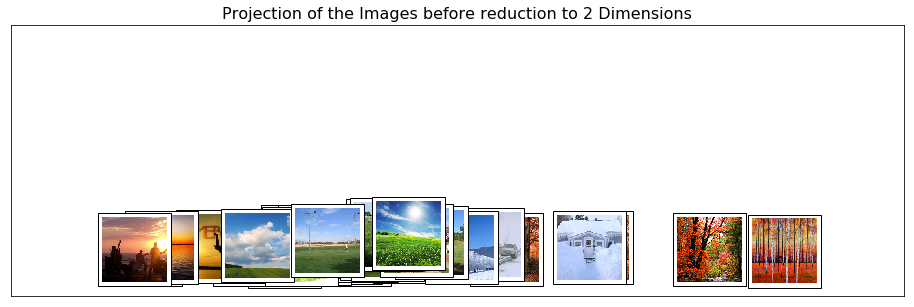

In [44]:
plot_image_space(images, X, title="Projection of the Images before reduction to 2 Dimensions")

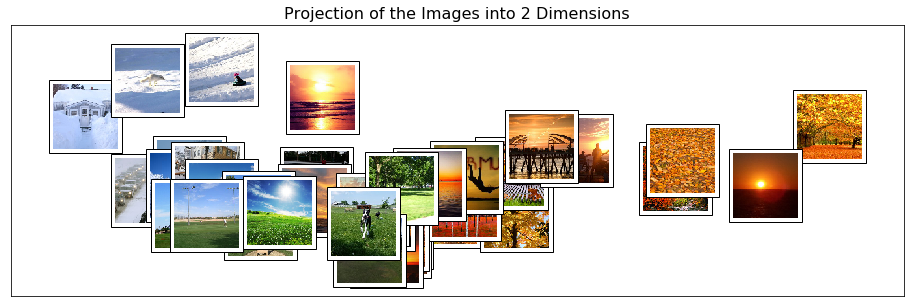

In [28]:
plot_image_space(images, pca2_transform, title="Projection of the Images into 2 Dimensions")

# Part 2

For each image, there is a histogram of 768 color values distributed over its pixels and each value of the histogram is the number of pixels in the image with the corresponding color value. Each value of the histogram is the number of pixels in the image with the corresponding color value and each histogram value can be considered to be a feature. Now when PCA is run on the images with number of components set to 2, images that have a similar histogram or composition of colors will also be similar in the 2-dimensional space as a result of PCA.

So after running PCA on the images we notice that images with similar composition (light blue , white ) are close together towards the left while images with an orange composition are close together on the right.

So in the output if two images are close together, then it means they have a similar color composition and if they are far apart it means they have differnt color composition.

# Part 3

In [83]:
img_dir2 = os.path.join(os.getcwd(), "images2") # directory path
images2 = load_images(img_dir2) # load images in the specified directory

In [84]:
X2 = pd.DataFrame([im.histogram() for im in images2])

In [85]:
X2

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,2024,1240,1092,357,82,33,45,32,15,15,...,0,0,3,8,75,345,1069,2015,2577,3908
1,3963,2283,1698,1081,569,222,104,51,15,7,...,0,0,0,0,0,0,0,0,0,0
2,2664,1206,951,575,313,263,169,142,122,147,...,56,54,79,60,107,88,45,123,33,345
3,9,4,3,17,21,65,50,11,19,26,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2289,587,644,636,603,532,519,419,420,321,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
pca3 = PCA(n_components = 2)

In [87]:
pca3_fit = pca3.fit(X2)

In [88]:
pca3_transform = pca3_fit.transform(X2)

In [89]:
pca3_fit.explained_variance_ratio_

array([0.35652635, 0.28182801])

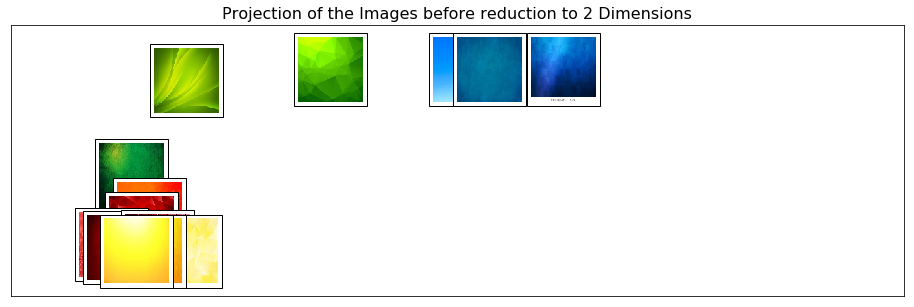

In [90]:
plot_image_space(images2, X2, title="Projection of the Images before reduction to 2 Dimensions")

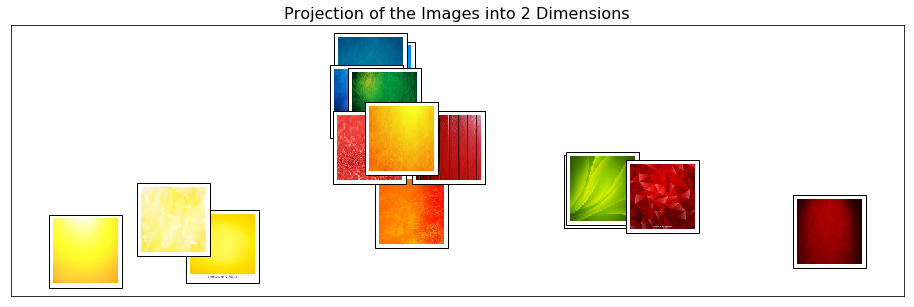

In [91]:
plot_image_space(images2, pca3_transform, title="Projection of the Images into 2 Dimensions")